In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 


## Generating Random Data
We will be generating a set of data using the make_blobs class.

Input these parameters into make_blobs:

    n_samples: The total number of points equally divided among clusters.
        Choose a number from 10-1500
    centers: The number of centers to generate, or the fixed center locations.
        Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
    cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
        Choose a number between 0.5-1.5


In [5]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)


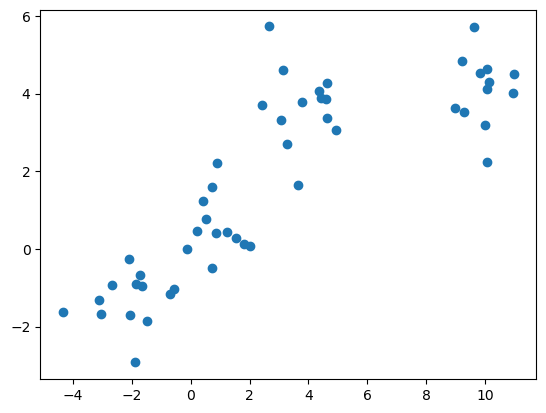

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

## Agglomerative Clustering

We will start by clustering the random data points we just created.

The Agglomerative Clustering class will require two inputs:

    n_clusters: The number of clusters to form as well as the number of centroids to generate.
        Value will be: 4
    linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
        Value will be: 'complete'
        Note: It is recommended you try everything with 'average' as well


Save the result to a variable called agglom . 

In [7]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [8]:
agglom.fit(X1,y1)

,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,None
,compute_distances,False


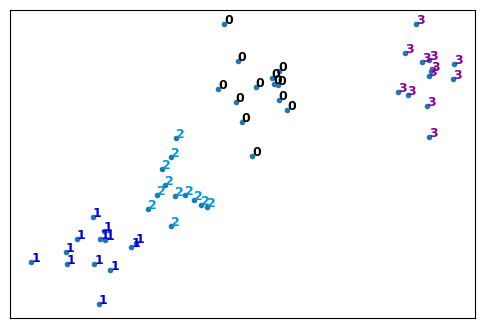

In [9]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [10]:


dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)



[[0.         1.0421247  0.50902926 ... 1.04655952 1.02586435 0.36710462]
 [1.0421247  0.         0.57374461 ... 0.0848857  0.01627692 0.71605213]
 [0.50902926 0.57374461 0.         ... 0.55909365 0.55784873 0.14791567]
 ...
 [1.04655952 0.0848857  0.55909365 ... 0.         0.0859009  0.7054817 ]
 [1.02586435 0.01627692 0.55784873 ... 0.0859009  0.         0.69996415]
 [0.36710462 0.71605213 0.14791567 ... 0.7054817  0.69996415 0.        ]]


In [11]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_23372/3518085107.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


In [13]:
!curl -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: cars_clus.csv
manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.000
Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.000
Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.000
Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.000
Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.000
Audi,A6,18.780,23.555,0.000,33.950,2.800,200.000,108.700,76.100,192.0

# Read data

In [15]:


filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)



Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


# Data Cleaning

In [16]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [17]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

# Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]


array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

# Clustering using Scipy

In [20]:
import numpy as np

leng = feature_mtx.shape[0]
D = np.zeros((leng, leng))
for i in range(leng):
    for j in range(leng):
        
        pass



In [21]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/tmp/ipykernel_23372/227076933.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [22]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

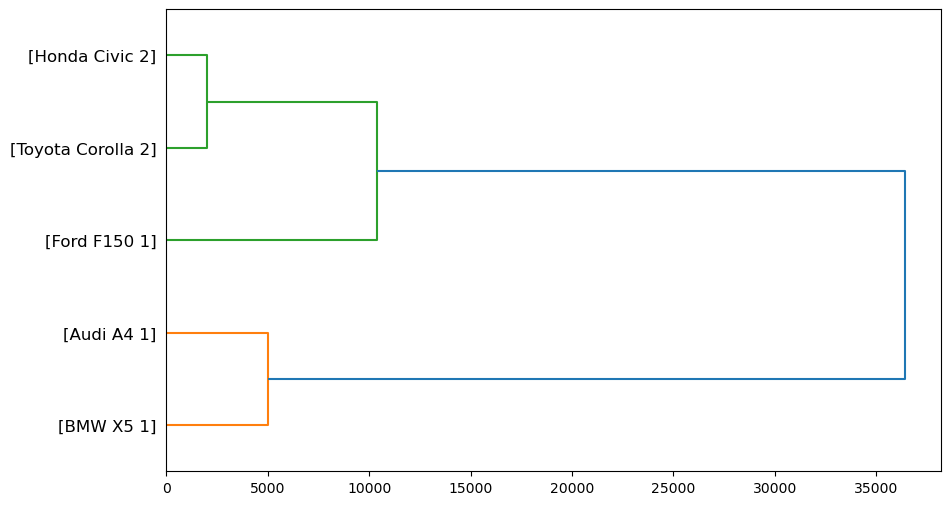

In [38]:
import pandas as pd
import numpy as np
import pylab
from scipy.cluster import hierarchy

# ======= 1. Sample data =======
data = {
    'manufact': ['Ford', 'Toyota', 'BMW', 'Honda', 'Audi'],
    'model': ['F150', 'Corolla', 'X5', 'Civic', 'A4'],
    'type': ['1', '2', '1', '2', '1'],
    'horsepow': [200, 132, 300, 158, 220],
    'engine_s': [4, 4, 6, 4, 6],
    'mpg': [20, 30, 18, 28, 22],
    'price': [30000, 20000, 50000, 22000, 45000]
}
pdf = pd.DataFrame(data)

# ======= 2. Feature matrix for clustering =======
feature_mtx = pdf[['horsepow', 'engine_s', 'mpg', 'price']].values

# ======= 3. Compute linkage =======
Z = hierarchy.linkage(feature_mtx, method='ward')

# ======= 4. Define leaf label function =======
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], pdf['type'][id])

# ======= 5. Plot dendrogram =======
fig = pylab.figure(figsize=(10, 6))
dendro = hierarchy.dendrogram(
    Z,
    leaf_label_func=llf,
    leaf_rotation=0,
    leaf_font_size=12,
    orientation='right'
)
pylab.show()



# Clustering using scikit-learn

In [27]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [28]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_23372/1633147189.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


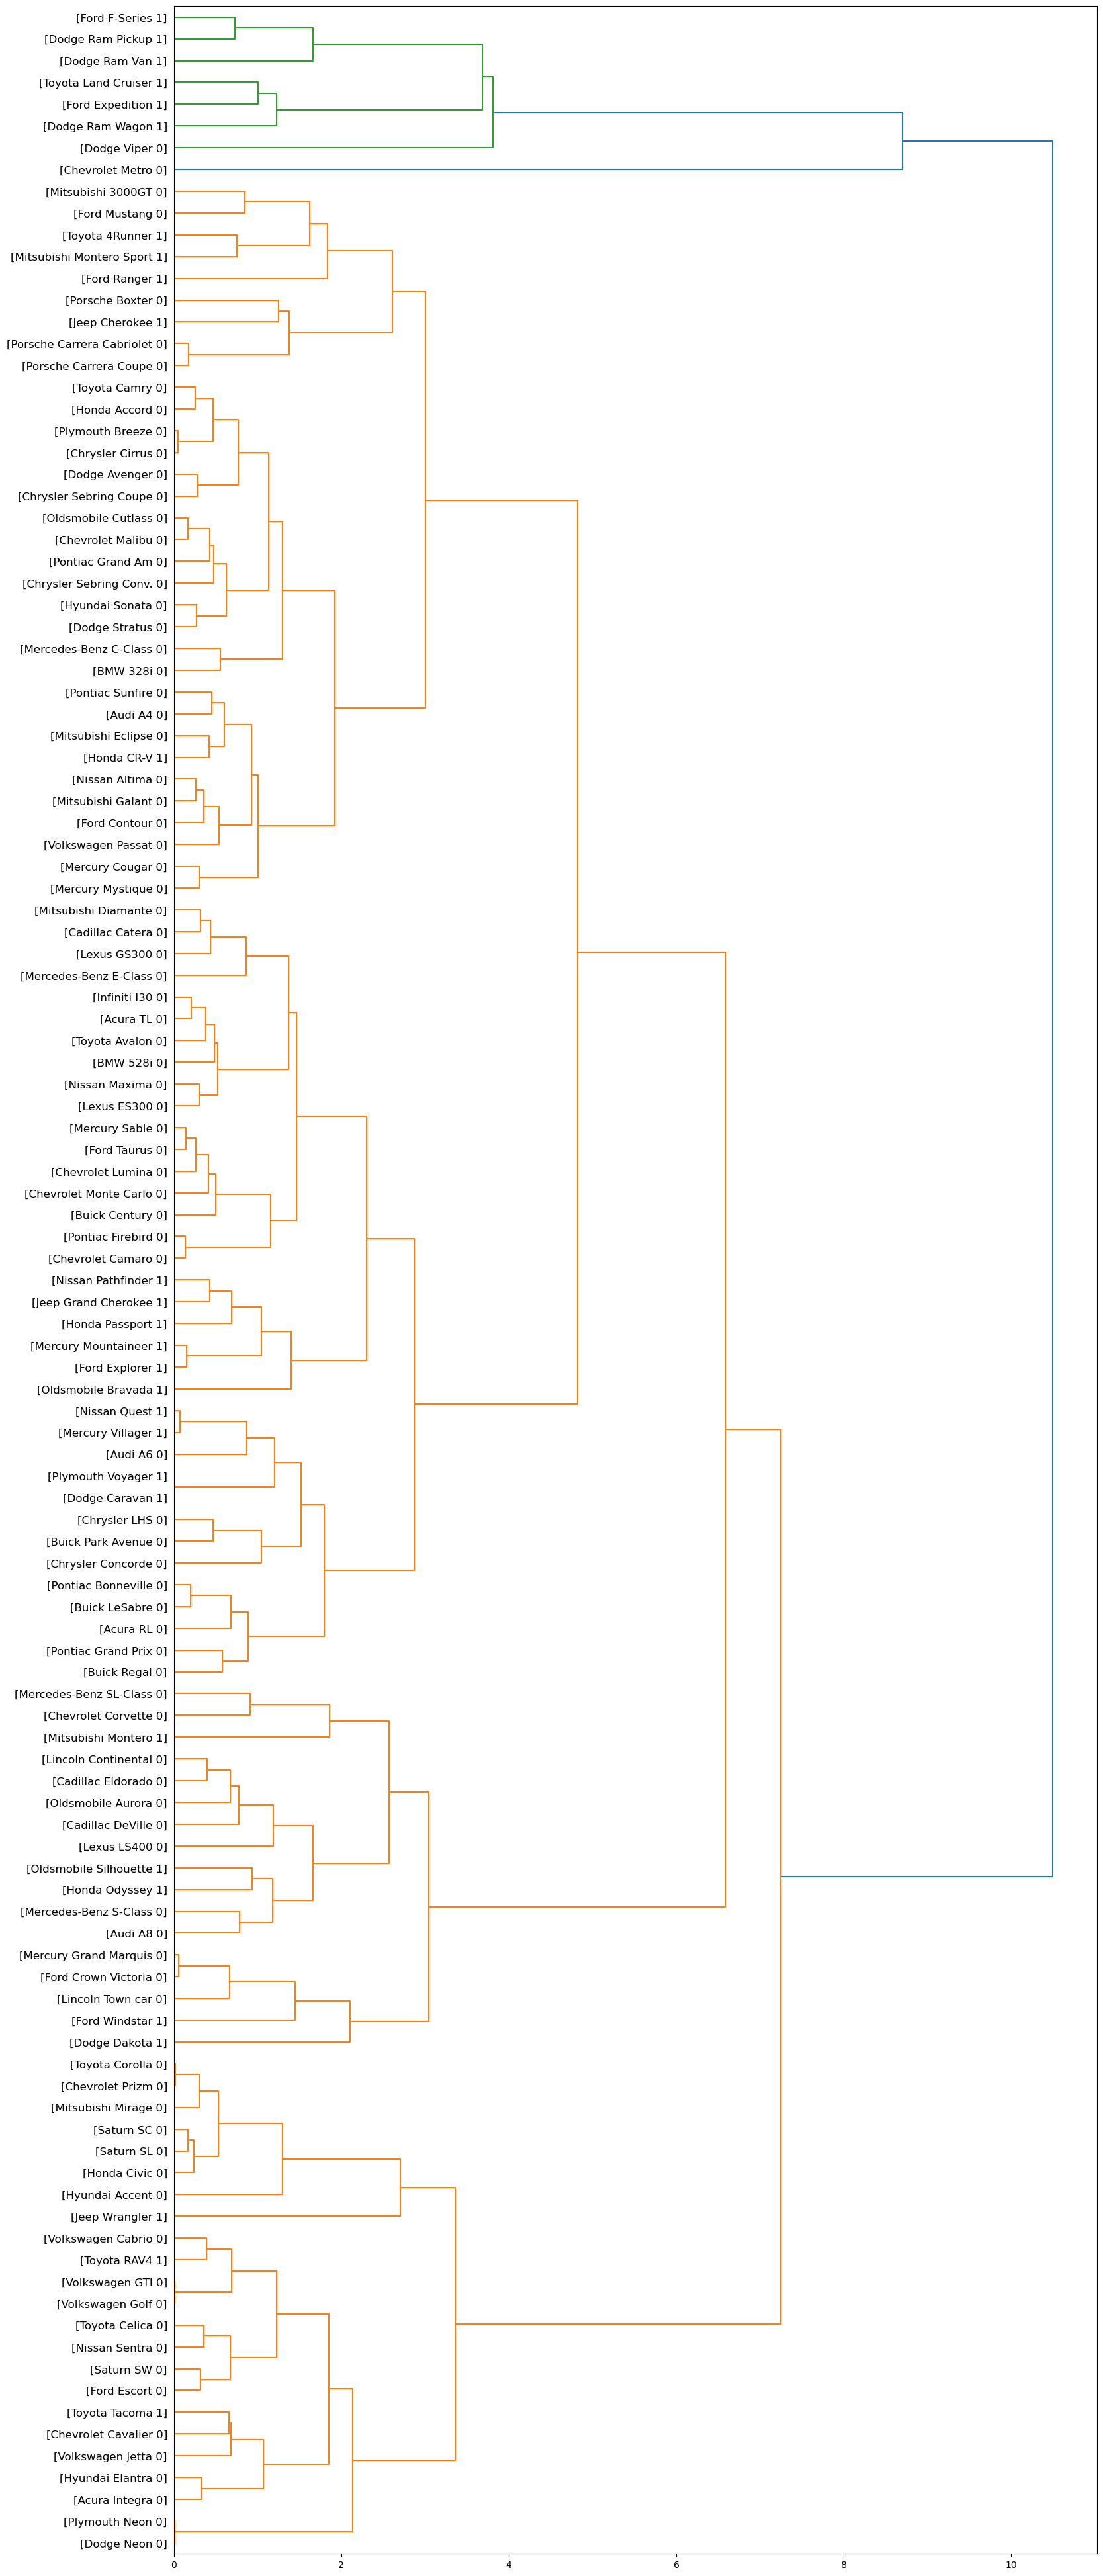

In [29]:


fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')



In [30]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_


/usr/lib/python3.13/site-packages/sklearn/cluster/_agglomerative.py:584: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

In [31]:
pdf['cluster_'] = agglom.labels_
pdf.head()


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


/tmp/ipykernel_23372/354728878.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

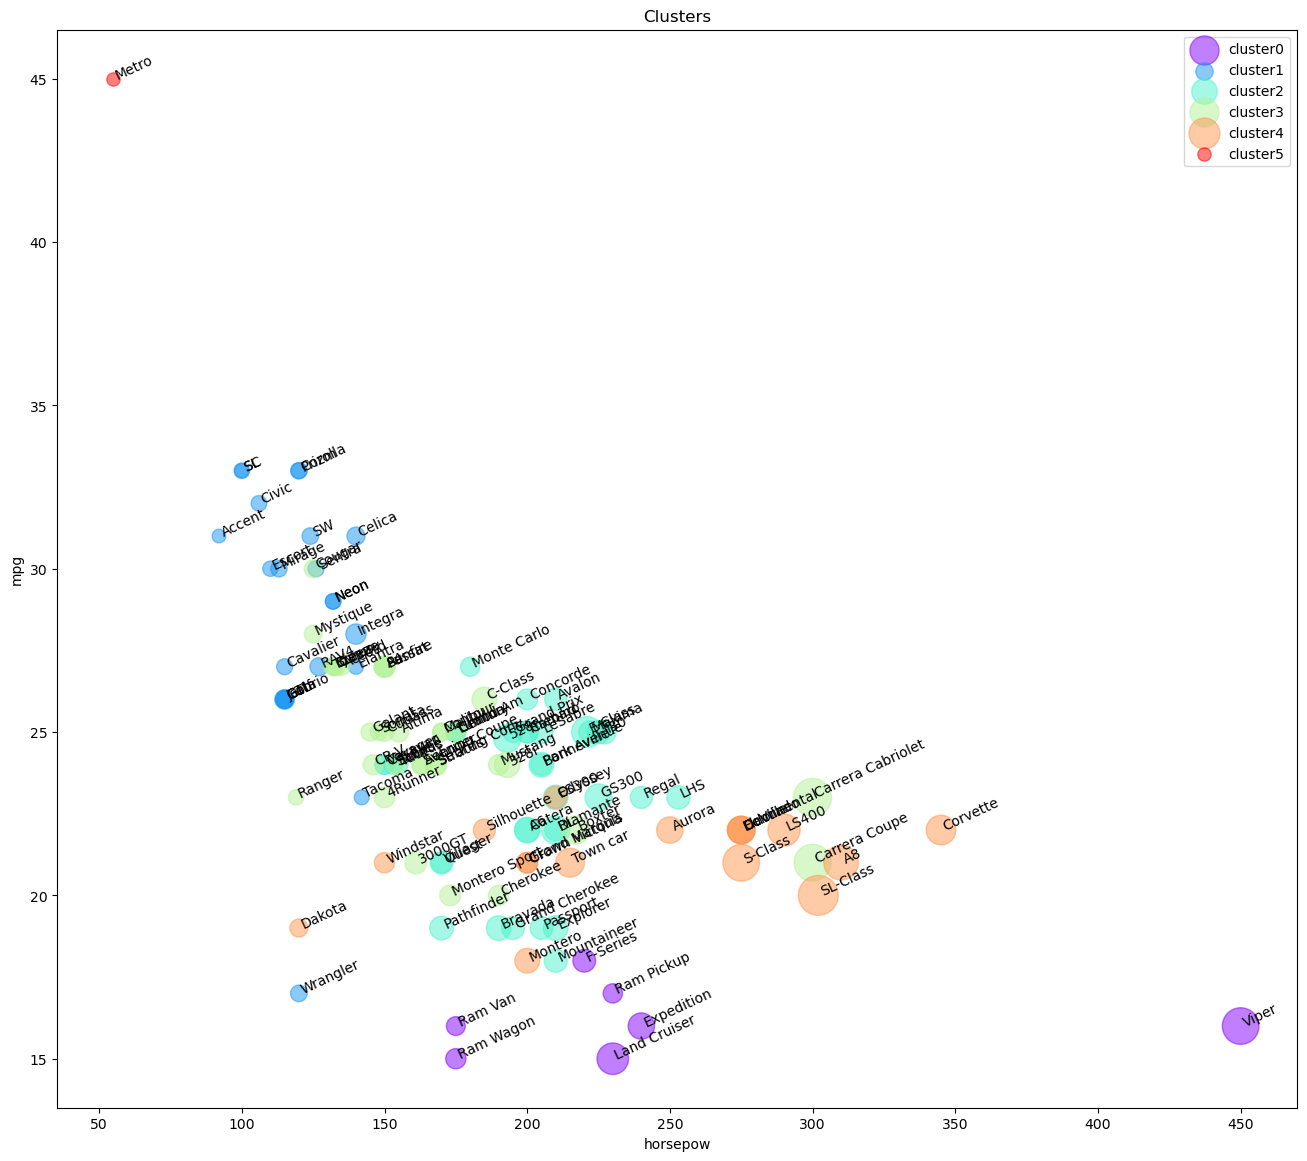

In [32]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


In [33]:


pdf.groupby(['cluster_','type'])['cluster_'].count()



cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [35]:
agg_cars = pdf.groupby(['cluster_','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

/tmp/ipykernel_23372/731385151.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
/tmp/ipykernel_23372/731385151.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

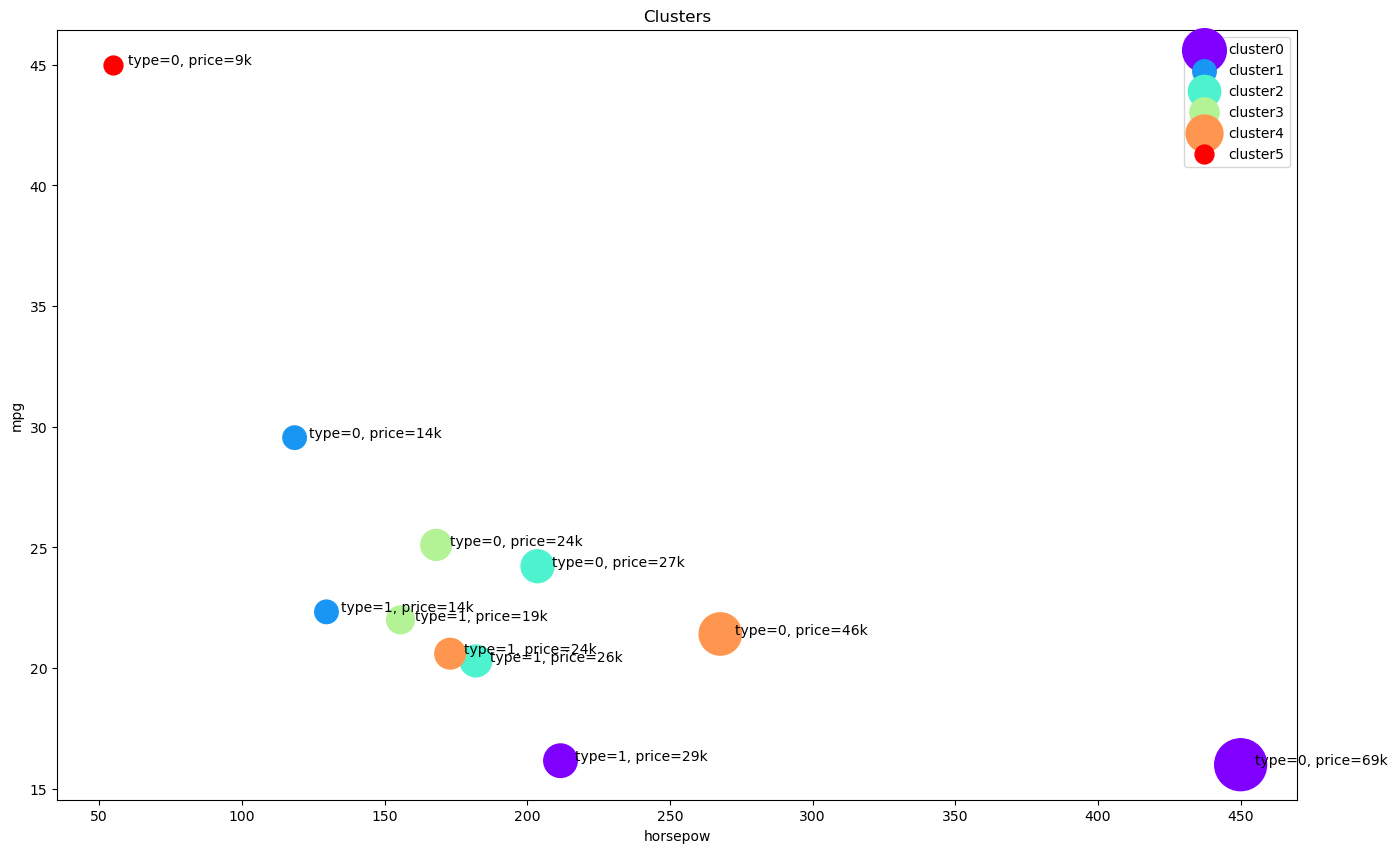

In [36]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')